In [86]:
from pystac.client import Client

# Open Overture STAC
# overture = Client.open("https://labs.overturemaps.org/stac/catalog.json")
overture = Client.open("http://localhost:8000/public_releases/catalog.json")

In [87]:
# List the current releases
for release in overture.get_children():
    print(release.id, release.title)

2025-05-21.0 Latest Overture Release
2025-04-23.0 2025-04-23.0 Overture Release


In [88]:
latest_release = [r.id for r in overture.get_children() if r.title == 'Latest Overture Release']
latest_release

['2025-05-21.0']

In [89]:
latest = overture.get_child(latest_release[0] if len(latest_release) else None)
latest

<Client id=2025-05-21.0>

In [90]:
# Iterate over the children
for release in overture.get_children():
    print(release.id, f"Is Latest: {release.extra_fields.get('latest')}")

2025-05-21.0 Is Latest: True
2025-04-23.0 Is Latest: None


In [91]:
for theme in latest.get_children():
    print(f"Theme: {theme.id}")
    for collection in theme.get_collections():
        print(f"Type: {collection.id}")
        print(collection.extra_fields)
        print("---")

Theme: addresses
Type: address
{'type': 'Collection'}
---
Theme: base
Type: bathymetry
{'type': 'Collection'}
---
Type: infrastructure
{'type': 'Collection'}
---
Type: land
{'type': 'Collection'}
---
Type: land_cover
{'type': 'Collection'}
---
Type: land_use
{'type': 'Collection'}
---
Type: water
{'type': 'Collection'}
---
Theme: buildings
Type: building
{'type': 'Collection'}
---
Type: building_part
{'type': 'Collection'}
---
Theme: divisions
Type: division
{'type': 'Collection'}
---
Type: division_area
{'type': 'Collection'}
---
Type: division_boundary
{'type': 'Collection'}
---
Theme: places
Type: place
{'type': 'Collection'}
---
Theme: transportation
Type: connector
{'type': 'Collection'}
---
Type: segment
{'type': 'Collection'}
---


/Users/jenningsa/jupyter-env/lib/python3.13/site-packages/pystac_client/client.py:441: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


In [92]:
# Also, STAC GeoParquet
import duckdb

In [93]:
duckdb.sql("LOAD SPATIAL;")
duckdb.sql("""
    LOAD SPATIAL;
    SELECT
        * 
    FROM 
        read_parquet('https://labs.overturemaps.org/stac/2025-05-21.0/places/place.parquet');
""").df()

,assets,bbox,collection,geometry,id,links,stac_extensions,stac_version,type,datetime,num_row_groups,num_rows
0,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -179.9993199, 'ymin': -88.04936002644...",place,"[2, 4, 0, 0, 0, 0, 0, 0, 212, 255, 51, 195, 70...",00000,"[{'href': None, 'rel': 'root', 'type': 'applic...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,73,10294469
1,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -179.9998627, 'ymin': 3.14e-05, 'xmax...",place,"[2, 4, 0, 0, 0, 0, 0, 0, 248, 255, 51, 195, 12...",00001,"[{'href': None, 'rel': 'root', 'type': 'applic...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,75,10302234
2,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -90.0, 'ymin': -89.913, 'xmax': 179.9...",place,"[2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 180, 194, 117, ...",00002,"[{'href': None, 'rel': 'root', 'type': 'applic...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,74,10244727
3,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': 1.88592821359634e-05, 'ymin': -44.999...",place,"[2, 4, 0, 0, 0, 0, 0, 0, 255, 51, 158, 55, 232...",00003,"[{'href': None, 'rel': 'root', 'type': 'applic...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,73,10267595
4,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': 8e-07, 'ymin': 22.5, 'xmax': 89.99999...",place,"[2, 4, 0, 0, 0, 0, 0, 0, 148, 191, 86, 53, 0, ...",00004,"[{'href': None, 'rel': 'root', 'type': 'applic...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,74,10289874
5,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': 0.3548978, 'ymin': 2.15e-05, 'xmax': ...",place,"[2, 4, 0, 0, 0, 0, 0, 0, 42, 181, 181, 62, 229...",00005,"[{'href': None, 'rel': 'root', 'type': 'applic...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,72,10282920


Or, the manifest is always available as GeoJSON:

[https://labs.overturemaps.org/stac/2025-05-21.0/manifest.geojson](https://labs.overturemaps.org/stac/2025-05-21.0/manifest.geojson)

In [94]:
import geopandas as gpd

In [98]:
manifest = gpd.read_file("https://labs.overturemaps.org/stac/2025-05-21.0/manifest.geojson")
manifest.head()

,ovt_type,rel_path,geometry
0,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-176.87453 -54.93804, -45.00001 -54...."
1,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-67.49998 -23.39916, -41.87157 -23.3..."
2,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-105.19104 -22.5, -32.39819 -22.5, -..."
3,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-124.56365 14.5863, -90 14.5863, -90..."
4,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-123.75 22.5, -90.44703 22.5, -90.44..."


<Axes: >

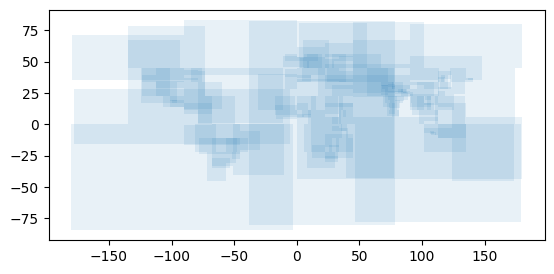

In [104]:
manifest[manifest.ovt_type=='building'].plot(alpha=0.1)